In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import random 
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV,KFold , RandomizedSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.utils.validation import check_is_fitted
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import shap
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('projet4.csv')
data.head()

,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUseWN(kBtu),TotalGHGEmissions,BuildingAge,ParkingRatioGFA,SteamUse(kBtu)_Usage,Electricity(kBtu)_Usage,NaturalGas(kBtu)_Usage,PropertyType_Bureaux et entrepôts,PropertyType_Commerce et services,PropertyType_Hotellerie,PropertyType_Soins de santé,LargestPropertyType_Bureaux et entrepôts,LargestPropertyType_Commerce et services,LargestPropertyType_Hotellerie,LargestPropertyType_Soins de santé,SecondLargestPropertyType_Bureaux et entrepôts,SecondLargestPropertyType_Commerce et services,SecondLargestPropertyType_Hotellerie,SecondLargestPropertyType_Soins de santé,ThirdLargestPropertyType_Bureaux et entrepôts,ThirdLargestPropertyType_Commerce et services,ThirdLargestPropertyType_Hotellerie,ThirdLargestPropertyType_Soins de santé,NombreEnergiesUtilisees
0,47.61220,-122.33799,1.0,12,88434,88434.0,0.0,0.0,60.0,7456910.0,249.98,89,0.000000,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,3
1,47.61317,-122.33393,1.0,11,103566,83880.0,15064.0,4622.0,61.0,8664479.0,295.86,20,0.145453,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,2
2,47.61393,-122.33810,1.0,41,956110,756493.0,0.0,0.0,43.0,73937112.0,2089.28,47,0.205748,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,3
3,47.61412,-122.33664,1.0,10,61320,61320.0,0.0,0.0,56.0,6946800.5,286.43,90,0.000000,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,3
4,47.61375,-122.34047,1.0,18,175580,123445.0,68009.0,0.0,75.0,14656503.0,505.01,36,0.353115,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,2


In [3]:
X=data.copy()

In [4]:
data.shape

(1466, 33)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1466 entries, 0 to 1465
Data columns (total 33 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Latitude                                        1466 non-null   float64
 1   Longitude                                       1466 non-null   float64
 2   NumberofBuildings                               1466 non-null   float64
 3   NumberofFloors                                  1466 non-null   int64  
 4   PropertyGFATotal                                1466 non-null   int64  
 5   LargestPropertyUseTypeGFA                       1466 non-null   float64
 6   SecondLargestPropertyUseTypeGFA                 1466 non-null   float64
 7   ThirdLargestPropertyUseTypeGFA                  1466 non-null   float64
 8   ENERGYSTARScore                                 953 non-null    float64
 9   SiteEnergyUseWN(kBtu)                    

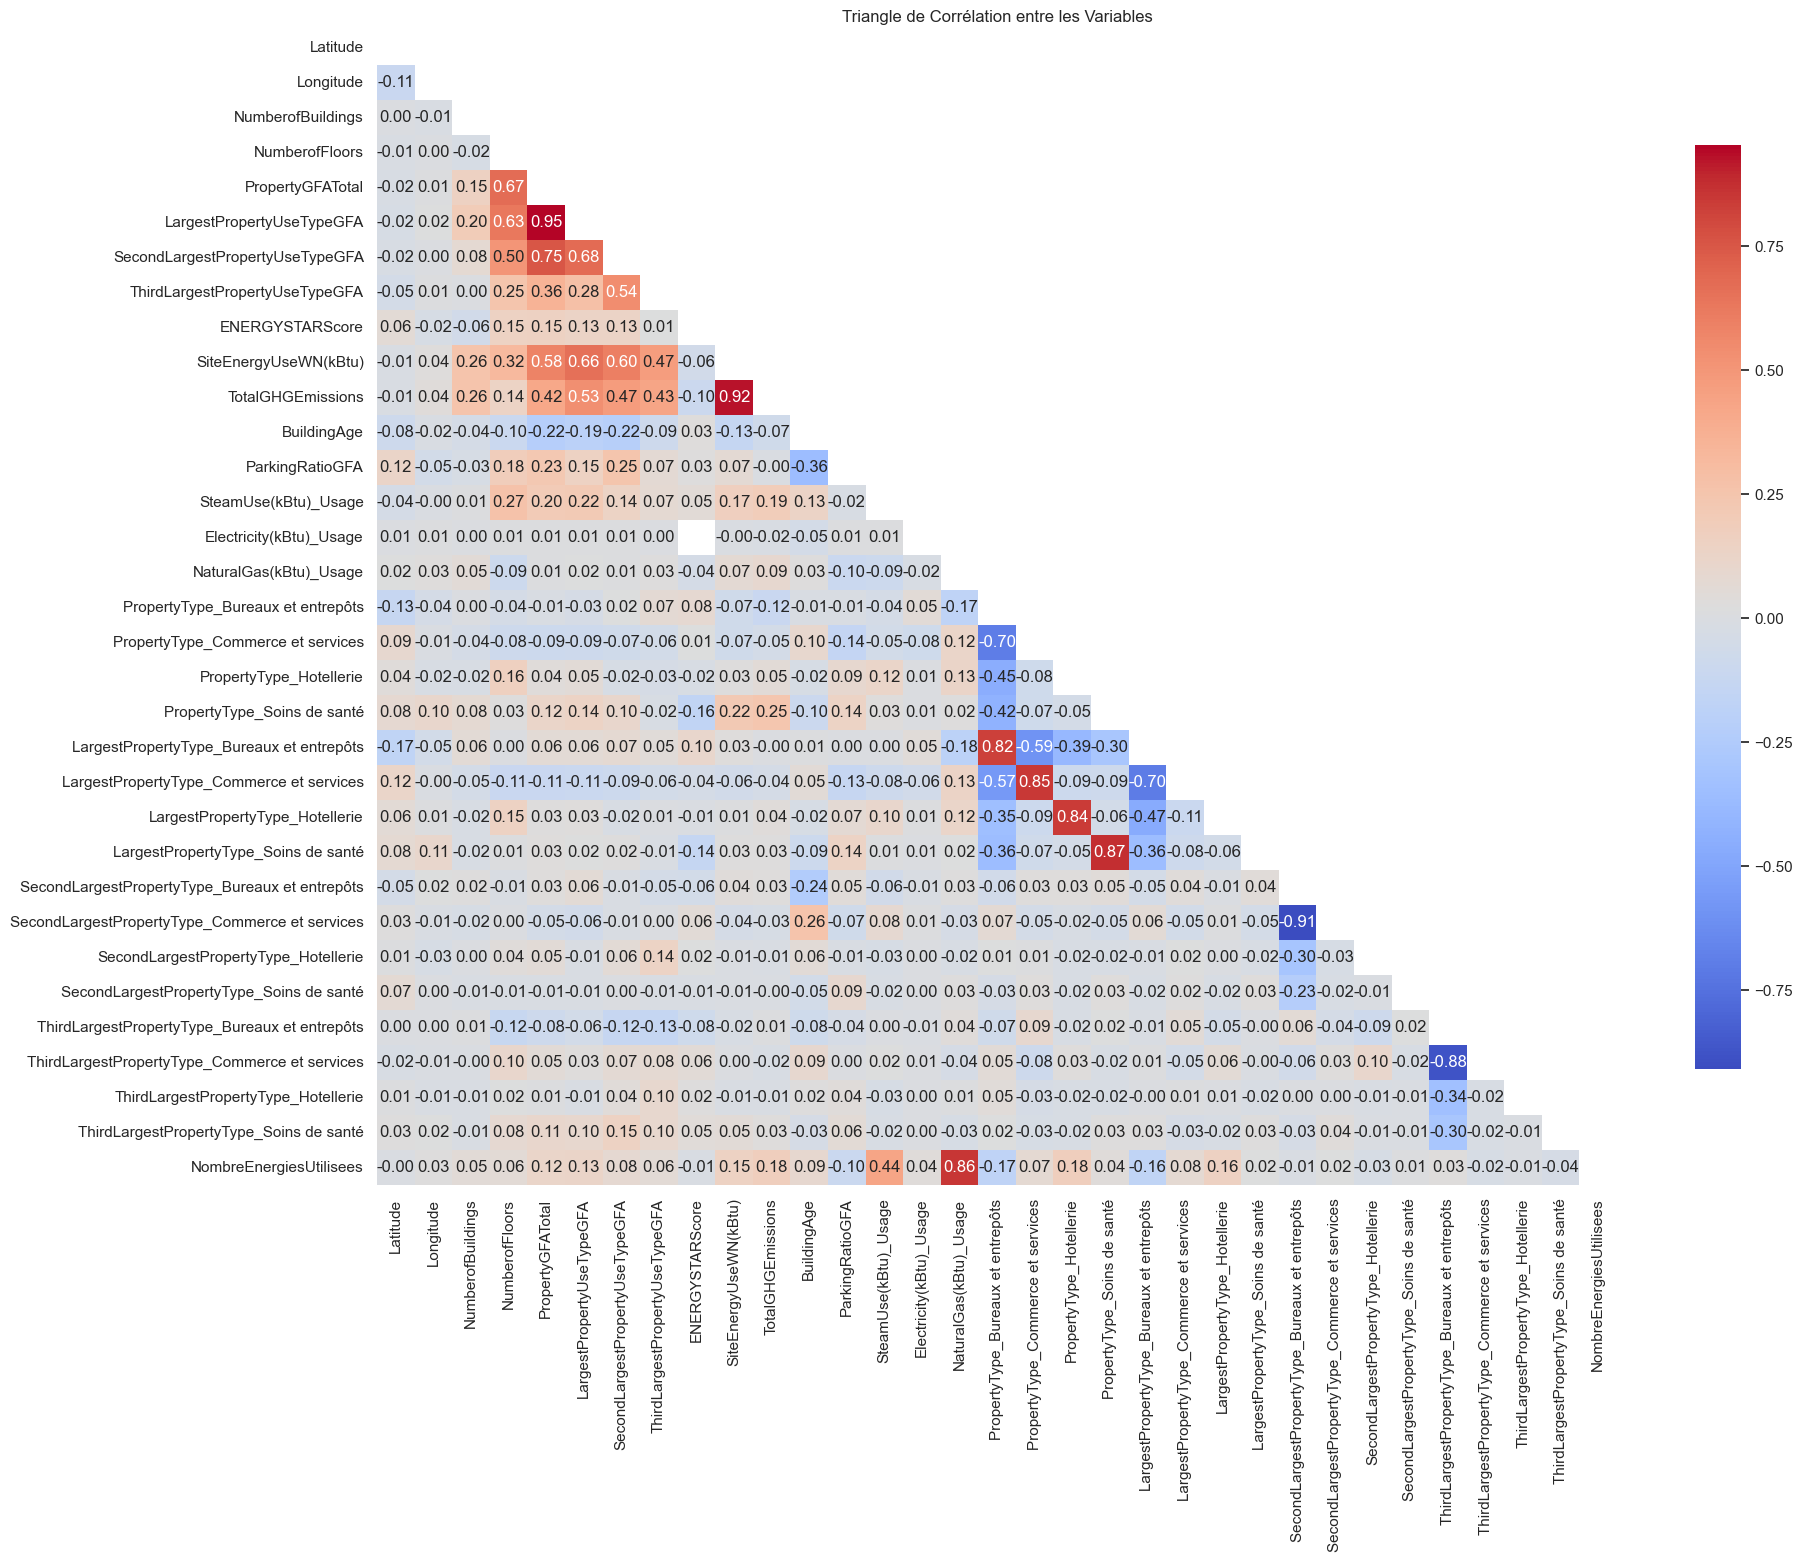

In [6]:
colonnes_numeriques2 = data.select_dtypes(include=[np.number]).columns.tolist()

## Matrice de correlation des variables
data[colonnes_numeriques2]

# Calcule de la matrice de corrélation
correlation_matrix = data[colonnes_numeriques2].corr()

# masque pour la moitié supérieure du triangle de corrélation
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Configuration du le style du tracé
sns.set(style="white")

# figure matplotlib
fig, ax = plt.subplots(figsize=(20, 15))

#le triangle de corrélation avec un dégradé de couleurs
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=mask, cbar_kws={"shrink": 0.8})

#  détails au graphique
plt.title("Triangle de Corrélation entre les Variables")
plt.show()

In [7]:
data.columns

Index(['Latitude', 'Longitude', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions',
       'BuildingAge', 'ParkingRatioGFA', 'SteamUse(kBtu)_Usage',
       'Electricity(kBtu)_Usage', 'NaturalGas(kBtu)_Usage',
       'PropertyType_Bureaux et entrepôts',
       'PropertyType_Commerce et services', 'PropertyType_Hotellerie',
       'PropertyType_Soins de santé',
       'LargestPropertyType_Bureaux et entrepôts',
       'LargestPropertyType_Commerce et services',
       'LargestPropertyType_Hotellerie', 'LargestPropertyType_Soins de santé',
       'SecondLargestPropertyType_Bureaux et entrepôts',
       'SecondLargestPropertyType_Commerce et services',
       'SecondLargestPropertyType_Hotellerie',
       'SecondLargestPropertyType_Soins de santé',
       'ThirdLargestPropertyType_Bureaux et entrepôts'

In [8]:
# Supprimer les variables
data = data.drop(['SiteEnergyUseWN(kBtu)', 'ENERGYSTARScore'], axis=1)


In [9]:
data.isna().sum()

Latitude                                          0
Longitude                                         0
NumberofBuildings                                 0
NumberofFloors                                    0
PropertyGFATotal                                  0
LargestPropertyUseTypeGFA                         0
SecondLargestPropertyUseTypeGFA                   0
ThirdLargestPropertyUseTypeGFA                    0
TotalGHGEmissions                                 0
BuildingAge                                       0
ParkingRatioGFA                                   0
SteamUse(kBtu)_Usage                              0
Electricity(kBtu)_Usage                           0
NaturalGas(kBtu)_Usage                            0
PropertyType_Bureaux et entrepôts                 0
PropertyType_Commerce et services                 0
PropertyType_Hotellerie                           0
PropertyType_Soins de santé                       0
LargestPropertyType_Bureaux et entrepôts          0
LargestPrope

# Modélisation 

In [10]:
# Création de la cible logarithmique (target)
target_col = 'TotalGHGEmissions'

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(data.drop(['TotalGHGEmissions', target_col], axis=1), data[target_col], test_size=0.2, random_state=42)

# Appliquer le logarithme naturel (log) à la variable cible y_train et y_test
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

In [11]:
# Créer un DataFrame vide pour stocker les résultats
results_df = pd.DataFrame(columns=['Model', 'R² Train', 'R² Test', 'RMSE', 'MAE', 'Training Time'])

# Utilisation de KFold
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Définir la graine aléatoire pour la reproductibilité
seed_value = 42
np.random.seed(seed_value)
random.seed(seed_value)

# Modèles à évaluer
models = {
    'Dummy': DummyRegressor(),
    'ElasticNet': ElasticNet(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVM': SVR(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor()
}

# Paramètres pour les modèles nécessitant une recherche d'hyperparamètres
param_grid = {
    'Ridge': {'alpha': [0.1, 1, 10]},
    'Lasso': {'alpha': [0.1, 1, 10]},
    'ElasticNet': {'alpha': [0.1, 1, 10], 'l1_ratio': [0.1, 0.5, 0.9]},
    'SVM': {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]}
}

# Boucle sur les modèles
for model_name, model in models.items():
    start_time = time.time()
    
    if model_name != 'Dummy':
        # Standardisation des données
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Recherche des meilleurs hyperparamètres avec RandomizedSearchCV
        random_search = RandomizedSearchCV(model, param_distributions=param_grid[model_name], n_iter=10, scoring='r2', cv=kf, refit=True)
        random_search.fit(X_train_scaled, y_train)

        # Prédire sur l'ensemble de test avec le meilleur modèle
        y_pred_train = random_search.predict(X_train_scaled)
        y_pred_test = random_search.predict(X_test_scaled)
        
    else:
        # Ajuster le modèle Dummy ou autres
        model.fit(X_train, y_train)
        
        # Prédire sur l'ensemble de test avec le modèle Dummy ou autres
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

    end_time = time.time()
    elapsed_time = end_time - start_time

    # Calculer les métriques de performance
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
   
    # Inverser la transformation logarithmique uniquement pour les métriques basées sur l'ensemble de test
    y_test_original_scale = np.expm1(y_test)
    y_pred_test_original_scale = np.expm1(y_pred_test)
    
    # Calculer RMSE et MAE sans  log
    rmse = np.sqrt(mean_squared_error(y_test_original_scale, y_pred_test_original_scale))
    mae = mean_absolute_error(y_test_original_scale, y_pred_test_original_scale)

    # Ajouter les résultats au DataFrame
    results_df = results_df.append({
        'Model': model_name,
        'R² Train': r2_train,
        'R² Test': r2_test,
        'RMSE': rmse,
        'MAE': mae,
        'Training Time': elapsed_time
    }, ignore_index=True)

    # Afficher les meilleurs hyperparamètres et le temps d'entraînement pour chaque modèle
    if model_name != 'Dummy':
        best_hyperparameters = random_search.best_params_
        print(f"Meilleurs hyperparamètres pour {model_name}: {best_hyperparameters}")
        print(f"Temps d'entraînement pour {model_name}: {elapsed_time} secondes")

# Afficher le DataFrame des résultats
results_df


Meilleurs hyperparamètres pour ElasticNet: {'l1_ratio': 0.1, 'alpha': 0.1}
Temps d'entraînement pour ElasticNet: 0.2472214698791504 secondes
Meilleurs hyperparamètres pour Ridge: {'alpha': 10}
Temps d'entraînement pour Ridge: 0.09674501419067383 secondes
Meilleurs hyperparamètres pour Lasso: {'alpha': 0.1}
Temps d'entraînement pour Lasso: 0.08043193817138672 secondes
Meilleurs hyperparamètres pour SVM: {'gamma': 0.01, 'C': 10}
Temps d'entraînement pour SVM: 7.734906196594238 secondes
Meilleurs hyperparamètres pour Random Forest: {'n_estimators': 200, 'max_depth': 10}
Temps d'entraînement pour Random Forest: 142.81062245368958 secondes
Meilleurs hyperparamètres pour XGBoost: {'n_estimators': 50, 'max_depth': 3}
Temps d'entraînement pour XGBoost: 21.538756847381592 secondes


,Model,R² Train,R² Test,RMSE,MAE,Training Time
0,Dummy,0.000000,-0.007433,1357.835575,247.817379,0.000000
1,ElasticNet,0.539126,0.562414,3440.997315,375.700228,0.247221
2,Ridge,0.546010,0.580030,6568.077533,567.062648,0.096745
3,Lasso,0.496789,0.519855,1619.341298,251.686909,0.080432
4,SVM,0.703650,0.647769,1064.202218,154.087333,7.734906
5,Random Forest,0.877505,0.670540,1116.743526,182.494484,142.810622
6,XGBoost,0.795000,0.682746,1006.233724,155.219019,21.538757


##  test  Model retenu sans CV 

### Random Forest

In [12]:
# Créer le modèle Random Forest avec les meilleurs hyperparamètres
best_rf_model = RandomForestRegressor(n_estimators = 200, max_depth= 10, random_state=42)

# Standardiser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraîner le modèle sur l'ensemble d'entraînement
best_rf_model.fit(X_train_scaled, y_train)

# Prédire sur l'ensemble de test
y_pred_test_rf = best_rf_model.predict(X_test_scaled)

# Inverser la transformation logarithmique pour les prédictions de l'ensemble de test
y_pred_test_original_scale = np.expm1(y_pred_test_rf)

# Inverser la transformation logarithmique pour les prédictions de l'ensemble d'entraînement
y_pred_train_rf = best_rf_model.predict(X_train_scaled)
y_pred_train_original_scale = np.expm1(y_pred_train_rf)

# Inverser la transformation logarithmique pour les vraies valeurs de l'ensemble de test
y_test_original_scale = np.expm1(y_test)

# Inverser la transformation logarithmique pour les vraies valeurs de l'ensemble d'entraînement
y_train_original_scale = np.expm1(y_train)

# Calculer les métriques de performance pour l'ensemble de test
r2_test_rf = r2_score(y_test, y_pred_test_rf)
rmse_test_rf = np.sqrt(mean_squared_error(y_test_original_scale, y_pred_test_original_scale))
mae_test_rf = mean_absolute_error(y_test_original_scale, y_pred_test_original_scale)

# Calculer les métriques de performance pour l'ensemble d'entraînement
r2_train_rf = r2_score(y_train, y_pred_train_rf)
rmse_train_rf = np.sqrt(mean_squared_error(y_train_original_scale, y_pred_train_original_scale))
mae_train_rf = mean_absolute_error(y_train_original_scale, y_pred_train_original_scale)

# Afficher les résultats pour le modèle Random Forest
print(f"Meilleurs hyperparamètres pour Random Forest : {best_rf_model.get_params()}")
print(f"R² de test pour Random Forest : {round(r2_test_rf,3)}")
print(f"RMSE de test pour Random Forest : {round(rmse_test_rf,2)}")
print(f"MAE de test pour Random Forest : {round(mae_test_rf,3)}")
print(f"R² d'entraînement pour Random Forest : {round(r2_train_rf,3)}")
print(f"Temps d'entraînement pour : {round(elapsed_time,2)} secondes")


Meilleurs hyperparamètres pour Random Forest : {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
R² de test pour Random Forest : 0.664
RMSE de test pour Random Forest : 1135.27
MAE de test pour Random Forest : 185.199
R² d'entraînement pour Random Forest : 0.878
Temps d'entraînement pour : 8.11 secondes


### XGBoost

In [13]:
# Créer le modèle XGBoost avec les meilleurs hyperparamètres
best_XGB_model = XGBRegressor(n_estimators=50, max_depth=3, random_state=42)

# Standardiser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraîner le modèle sur l'ensemble d'entraînement
best_XGB_model.fit(X_train_scaled, y_train)

# Prédire sur l'ensemble de test
y_pred_test_xgb = best_XGB_model.predict(X_test_scaled)

# Inverser la transformation logarithmique pour les prédictions de l'ensemble de test
y_pred_test_original_scale_xgb = np.expm1(y_pred_test_xgb)

# Prédire sur l'ensemble d'entraînement
y_pred_train_xgb = best_XGB_model.predict(X_train_scaled)

# Inverser la transformation logarithmique pour les prédictions de l'ensemble d'entraînement
y_pred_train_original_scale_xgb = np.expm1(y_pred_train_xgb)

# Calculer les métriques de performance pour le modèle XGBoost sur l'ensemble de test
r2_test_xgb = r2_score(y_test, y_pred_test_xgb)
rmse_test_xgb = np.sqrt(mean_squared_error(y_test_original_scale, y_pred_test_original_scale_xgb))
mae_test_xgb = mean_absolute_error(y_test_original_scale, y_pred_test_original_scale_xgb)

# Calculer les métriques de performance pour le modèle XGBoost sur l'ensemble d'entraînement
r2_train_xgb = r2_score(y_train, y_pred_train_xgb)
rmse_train_xgb = np.sqrt(mean_squared_error(y_train_original_scale, y_pred_train_original_scale_xgb))
mae_train_xgb = mean_absolute_error(y_train_original_scale, y_pred_train_original_scale_xgb)

# Afficher les résultats pour le modèle XGBoost
print(f"Meilleurs hyperparamètres pour XGBRegressor: {best_XGB_model.get_params()}")
print(f"R² de test pour XGBRegressor: {round(r2_test_xgb, 3)}")
print(f"RMSE de test pour XGBRegressor: {round(rmse_test_xgb, 2)}")
print(f"MAE de test pour XGBRegressor: {round(mae_test_xgb, 3)}")
print(f"R² d'entraînement pour XGBRegressor: {round(r2_train_xgb, 3)}")
print(f"Temps d'entraînement pour: {round(elapsed_time, 2)} secondes")


Meilleurs hyperparamètres pour XGBRegressor: {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 3, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 50, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
R² de test pour XGBRegressor: 0.683
RMSE de test pour XGBRegr

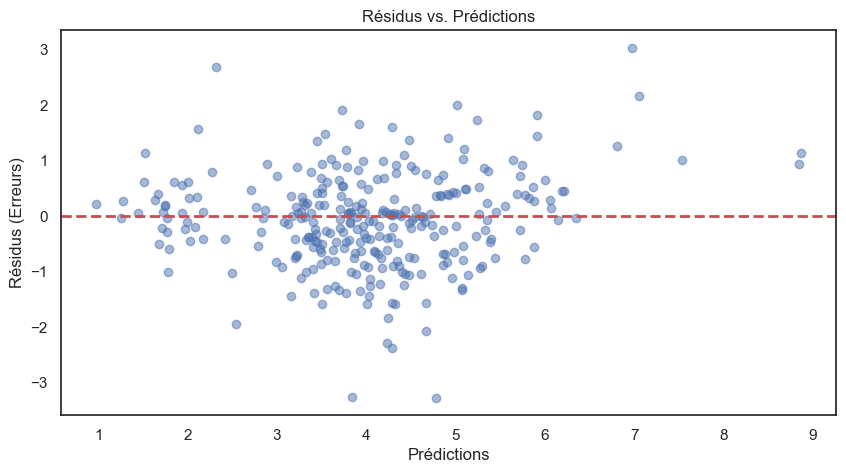

In [14]:
# Calculer les résidus (erreurs)
residuals = y_test - y_pred_test_rf

# Visualiser les résidus en fonction des prédictions
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Prédictions')
plt.ylabel('Résidus (Erreurs)')
plt.title('Résidus vs. Prédictions')
plt.show()


### Feature importance

#### importance globale

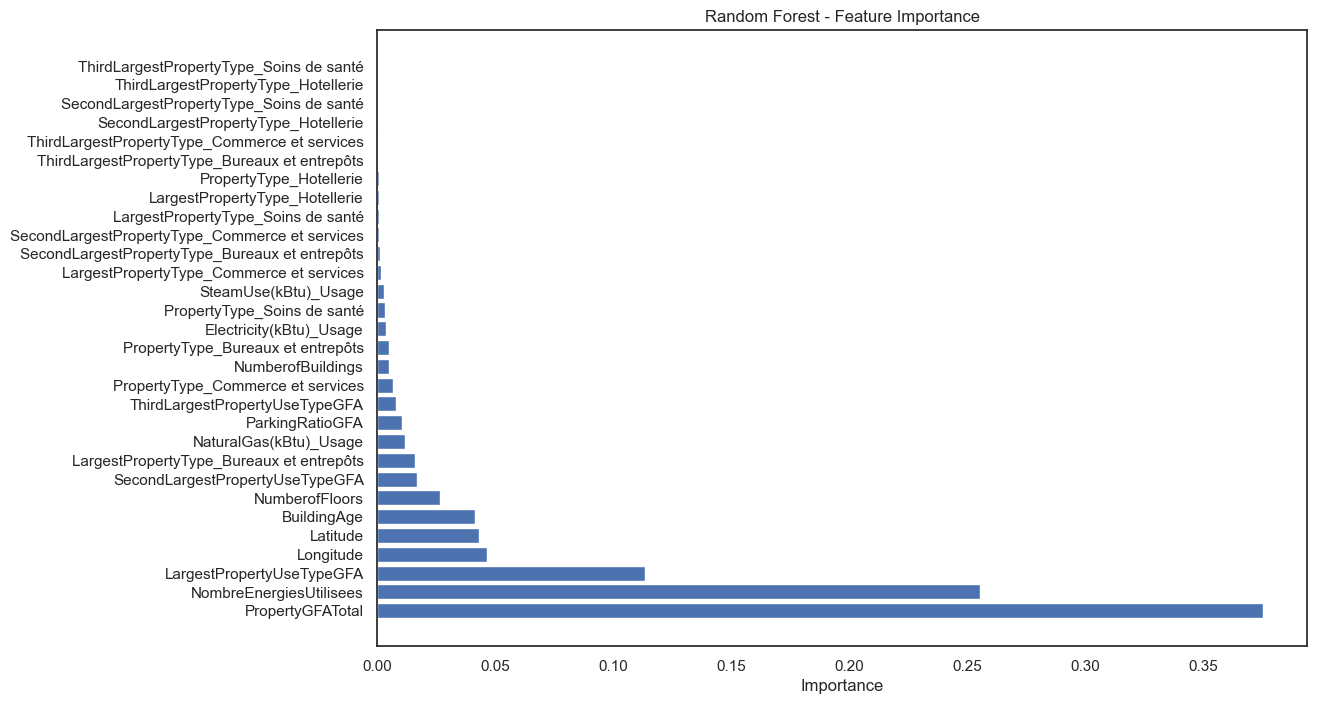

In [15]:
# Extraire l'importance des caractéristiques du modèle Random Forest
feature_importance = best_rf_model.feature_importances_

# Créer un DataFrame avec les noms des caractéristiques et leurs importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Trier le DataFrame par importances décroissantes
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Tracer le graphique des caractéristiques importantes
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Random Forest - Feature Importance')
plt.show()


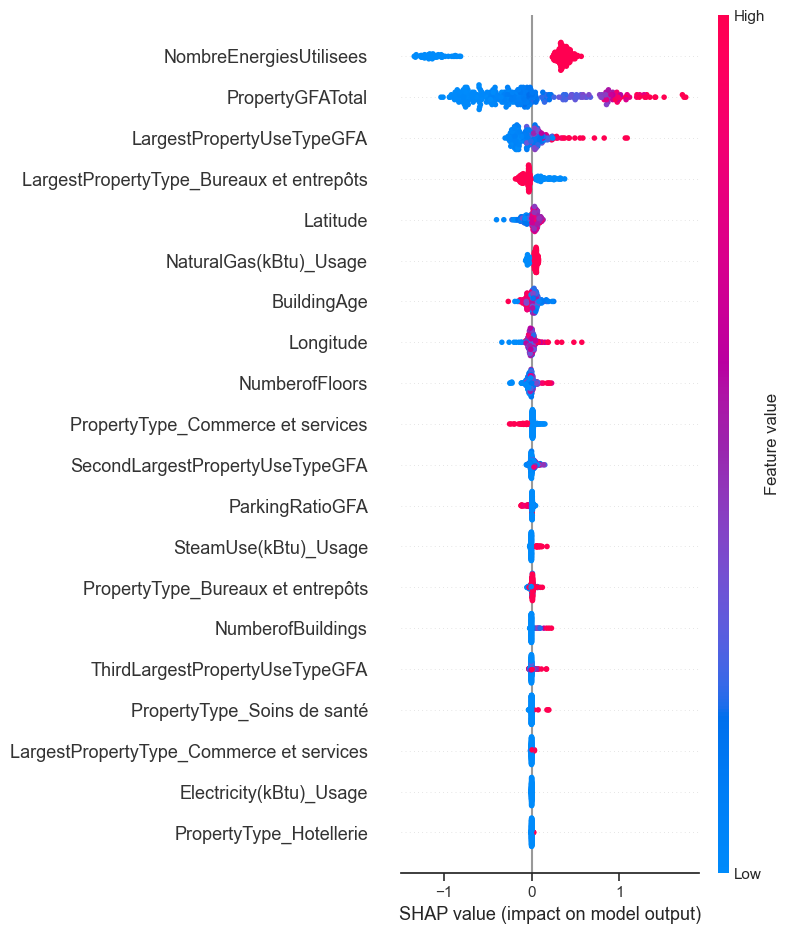

In [16]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns)

# Calculer les valeurs SHAP pour l'ensemble de test
explainer = shap.Explainer(best_rf_model)
shap_values = explainer.shap_values(X_test_scaled)

# Afficher le summary_plot avec les noms de variables
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_test_scaled.columns)


#### importance locale 

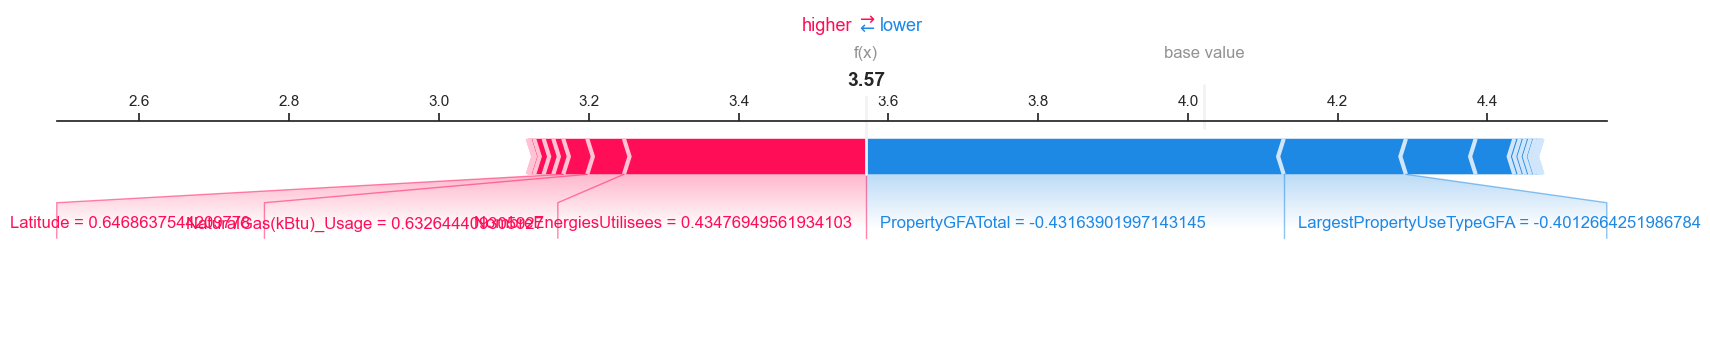

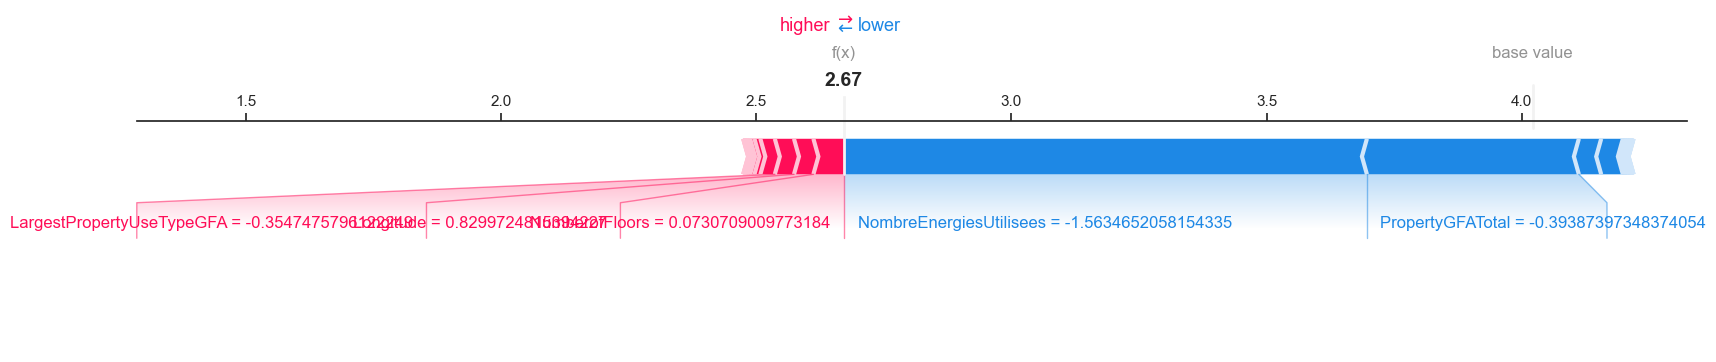

In [17]:
# Choisir plusieurs observations (par exemple, les cinq premières observations dans X_test)
observations = X_test_scaled.head(2)

# Afficher les plots pour chaque observation spécifique
for i in range(len(observations)):
    observation = observations.iloc[i]
    shap_values_single = explainer.shap_values(observation)
    
    # Utiliser la fonction shap.force_plot avec matplotlib
    shap.force_plot(explainer.expected_value, shap_values_single, observation, feature_names=X_test_scaled.columns, matplotlib=True)
    plt.show()  # Afficher le graphique



# Simulation avec d’autres variables

In [18]:
data['BuildingDensity'] = data['NumberofBuildings'] / data['PropertyGFATotal']
data['FloorsPerBuilding'] = data['NumberofFloors'] / data['NumberofBuildings']


In [19]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(data.drop(['TotalGHGEmissions', target_col], axis=1), data[target_col], test_size=0.2, random_state=42)

# Appliquer le logarithme naturel (log) à la variable cible y_train et y_test
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

In [20]:
data.shape

(1466, 33)

In [21]:
data.head()

,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,TotalGHGEmissions,BuildingAge,ParkingRatioGFA,SteamUse(kBtu)_Usage,Electricity(kBtu)_Usage,NaturalGas(kBtu)_Usage,PropertyType_Bureaux et entrepôts,PropertyType_Commerce et services,PropertyType_Hotellerie,PropertyType_Soins de santé,LargestPropertyType_Bureaux et entrepôts,LargestPropertyType_Commerce et services,LargestPropertyType_Hotellerie,LargestPropertyType_Soins de santé,SecondLargestPropertyType_Bureaux et entrepôts,SecondLargestPropertyType_Commerce et services,SecondLargestPropertyType_Hotellerie,SecondLargestPropertyType_Soins de santé,ThirdLargestPropertyType_Bureaux et entrepôts,ThirdLargestPropertyType_Commerce et services,ThirdLargestPropertyType_Hotellerie,ThirdLargestPropertyType_Soins de santé,NombreEnergiesUtilisees,BuildingDensity,FloorsPerBuilding
0,47.61220,-122.33799,1.0,12,88434,88434.0,0.0,0.0,249.98,89,0.000000,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,3,0.000011,12.0
1,47.61317,-122.33393,1.0,11,103566,83880.0,15064.0,4622.0,295.86,20,0.145453,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,2,0.000010,11.0
2,47.61393,-122.33810,1.0,41,956110,756493.0,0.0,0.0,2089.28,47,0.205748,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,3,0.000001,41.0
3,47.61412,-122.33664,1.0,10,61320,61320.0,0.0,0.0,286.43,90,0.000000,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,3,0.000016,10.0
4,47.61375,-122.34047,1.0,18,175580,123445.0,68009.0,0.0,505.01,36,0.353115,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,2,0.000006,18.0


In [22]:
# Créer le modèle Random Forest avec les meilleurs hyperparamètres
best_rf_model = RandomForestRegressor(n_estimators = 200, max_depth= 10, random_state=42)

# Standardiser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraîner le modèle sur l'ensemble d'entraînement
best_rf_model.fit(X_train_scaled, y_train)

# Prédire sur l'ensemble de test
y_pred_test_rf = best_rf_model.predict(X_test_scaled)

# Inverser la transformation logarithmique pour les prédictions de l'ensemble de test
y_pred_test_original_scale_rf = np.expm1(y_pred_test_rf)

# Calculer les métriques de performance pour le modèle Random Forest sur l'ensemble de test
r2_test_rf = r2_score(y_test, y_pred_test_rf)
rmse_test_rf = np.sqrt(mean_squared_error(y_test_original_scale, y_pred_test_original_scale_rf))
mae_test_rf = mean_absolute_error(y_test_original_scale, y_pred_test_original_scale_rf)

# Prédire sur l'ensemble d'entraînement
y_pred_train_rf = best_rf_model.predict(X_train_scaled)

# Inverser la transformation logarithmique pour les prédictions de l'ensemble d'entraînement
y_pred_train_original_scale_rf = np.expm1(y_pred_train_rf)

# Calculer les métriques de performance pour le modèle Random Forest sur l'ensemble d'entraînement
r2_train_rf = r2_score(y_train, y_pred_train_rf)
rmse_train_rf = np.sqrt(mean_squared_error(y_train_original_scale, y_pred_train_original_scale_rf))
mae_train_rf = mean_absolute_error(y_train_original_scale, y_pred_train_original_scale_rf)

# Afficher les résultats pour le modèle Random Forest
print(f"Meilleurs hyperparamètres pour Random Forest : {best_rf_model.get_params()}")
print(f"R² de test pour Random Forest : {round(r2_test_rf,3)}")
print(f"RMSE de test pour Random Forest : {round(rmse_test_rf, 2)}")
print(f"MAE de test pour Random Forest : {round(mae_test_rf, 3)}")
print(f"R² d'entraînement pour Random Forest : {round(r2_train_rf, 3)}")

Meilleurs hyperparamètres pour Random Forest : {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
R² de test pour Random Forest : 0.663
RMSE de test pour Random Forest : 1149.78
MAE de test pour Random Forest : 186.773
R² d'entraînement pour Random Forest : 0.879


Il semble y avoir une légère diminution du coefficient de détermination R² après l'ajout des nouvelles variables.

## ENERGYSTARScore

In [23]:
X.head()

,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUseWN(kBtu),TotalGHGEmissions,BuildingAge,ParkingRatioGFA,SteamUse(kBtu)_Usage,Electricity(kBtu)_Usage,NaturalGas(kBtu)_Usage,PropertyType_Bureaux et entrepôts,PropertyType_Commerce et services,PropertyType_Hotellerie,PropertyType_Soins de santé,LargestPropertyType_Bureaux et entrepôts,LargestPropertyType_Commerce et services,LargestPropertyType_Hotellerie,LargestPropertyType_Soins de santé,SecondLargestPropertyType_Bureaux et entrepôts,SecondLargestPropertyType_Commerce et services,SecondLargestPropertyType_Hotellerie,SecondLargestPropertyType_Soins de santé,ThirdLargestPropertyType_Bureaux et entrepôts,ThirdLargestPropertyType_Commerce et services,ThirdLargestPropertyType_Hotellerie,ThirdLargestPropertyType_Soins de santé,NombreEnergiesUtilisees
0,47.61220,-122.33799,1.0,12,88434,88434.0,0.0,0.0,60.0,7456910.0,249.98,89,0.000000,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,3
1,47.61317,-122.33393,1.0,11,103566,83880.0,15064.0,4622.0,61.0,8664479.0,295.86,20,0.145453,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,2
2,47.61393,-122.33810,1.0,41,956110,756493.0,0.0,0.0,43.0,73937112.0,2089.28,47,0.205748,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,3
3,47.61412,-122.33664,1.0,10,61320,61320.0,0.0,0.0,56.0,6946800.5,286.43,90,0.000000,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,3
4,47.61375,-122.34047,1.0,18,175580,123445.0,68009.0,0.0,75.0,14656503.0,505.01,36,0.353115,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,2


In [24]:
X.dropna(inplace=True)

In [25]:
# Supprimer les variables
X= X.drop('SiteEnergyUseWN(kBtu)', axis=1)


In [26]:
# Fixer la graine aléatoire
seed_value = 42
np.random.seed(seed_value)
random.seed(seed_value)

# Création de la cible logarithmique (target)
target_col = 'TotalGHGEmissions'
X_train, X_test, y_train, y_test = train_test_split(X.drop(['TotalGHGEmissions', target_col], axis=1), X[target_col], test_size=0.2, random_state=42)

# Appliquer le logarithme naturel (log) à la variable cible y_train et y_test
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

In [27]:
# Créer le modèle Random Forest avec les meilleurs hyperparamètres
best_rf_model = RandomForestRegressor(n_estimators = 200, max_depth= 10, random_state=42)

# Standardiser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraîner le modèle sur l'ensemble d'entraînement
best_rf_model.fit(X_train_scaled, y_train)

# Prédire sur l'ensemble de test
y_pred_test_rf = best_rf_model.predict(X_test_scaled)

# Inverser la transformation logarithmique pour les prédictions de l'ensemble de test
y_pred_test_original_scale_rf = np.expm1(y_pred_test_rf)

# Inverser la transformation logarithmique pour les vraies valeurs de l'ensemble de test
y_test_original_scale = np.expm1(y_test)

# Prédire sur l'ensemble d'entraînement
y_pred_train_rf = best_rf_model.predict(X_train_scaled)

# Inverser la transformation logarithmique pour les prédictions de l'ensemble d'entraînement
y_pred_train_original_scale_rf = np.expm1(y_pred_train_rf)

# Inverser la transformation logarithmique pour les vraies valeurs de l'ensemble d'entraînement
y_train_original_scale = np.expm1(y_train)

# Calculer les métriques de performance pour le modèle Random Forest avec les valeurs inversées
r2_test_rf = r2_score(y_test_original_scale, y_pred_test_original_scale_rf)
rmse_test_rf = np.sqrt(mean_squared_error(y_test_original_scale, y_pred_test_original_scale_rf))
mae_test_rf = mean_absolute_error(y_test_original_scale, y_pred_test_original_scale_rf)

r2_train_rf = r2_score(y_train_original_scale, y_pred_train_original_scale_rf)
rmse_train_rf = np.sqrt(mean_squared_error(y_train_original_scale, y_pred_train_original_scale_rf))
mae_train_rf = mean_absolute_error(y_train_original_scale, y_pred_train_original_scale_rf)

# Afficher les résultats pour le modèle Random Forest avec les valeurs inversées
print(f"Meilleurs hyperparamètres pour Random Forest : {best_rf_model.get_params()}")
print(f"R² de test pour Random Forest : {round(r2_test_rf, 3)}")
print(f"RMSE de test pour Random Forest : {round(rmse_test_rf, 2)}")
print(f"MAE de test pour Random Forest : {round(mae_test_rf, 3)}")
print(f"R² d'entraînement pour Random Forest : {round(r2_train_rf, 3)}")

Meilleurs hyperparamètres pour Random Forest : {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
R² de test pour Random Forest : 0.778
RMSE de test pour Random Forest : 402.89
MAE de test pour Random Forest : 91.635
R² d'entraînement pour Random Forest : 0.675


L'ajout de la variable 'ENERGYSTARScore' a conduit à une amélioration significative des performances du modèle, avec une augmentation du coefficient de détermination (R²) de test.L'inclusion de cette variable a également entraîné une réduction du RMSE et du MAE (Mean Absolute Error), indiquant une meilleure précision des prédictions.


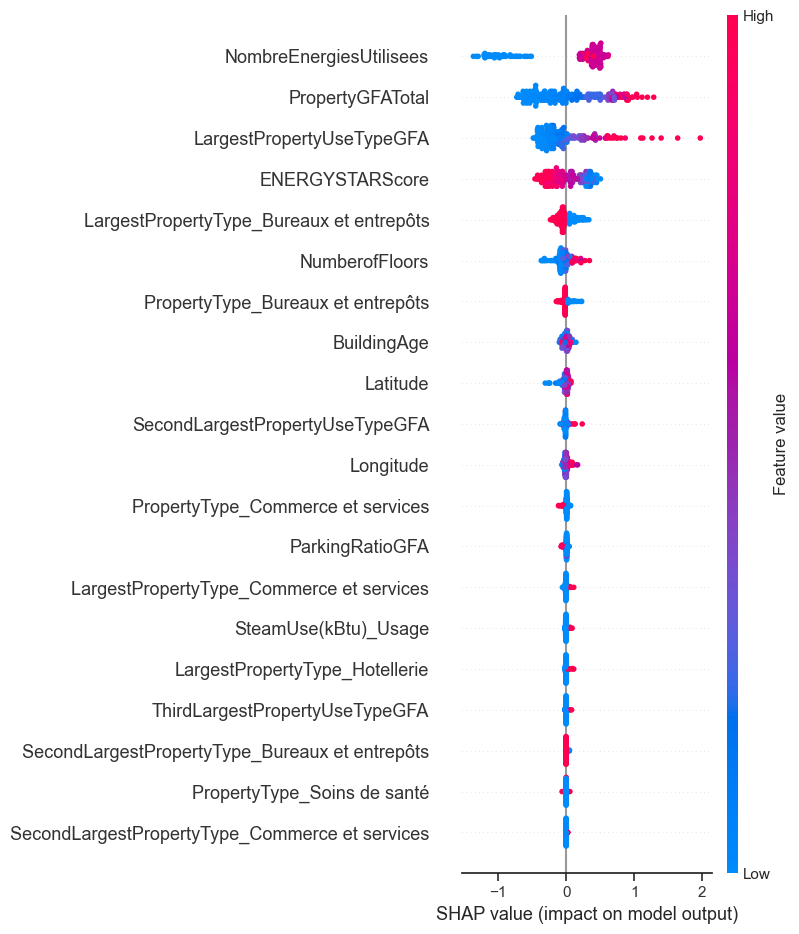

In [28]:

X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns)

# Calculer les valeurs SHAP pour l'ensemble de test
explainer = shap.Explainer(best_rf_model)
shap_values = explainer.shap_values(X_test_scaled)

# Afficher le summary_plot avec les noms de variables
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_test_scaled.columns)

In [29]:
X['AgeToENERGYSTARRatio'] = X['BuildingAge'] / X['ENERGYSTARScore']

In [30]:
# Fixer la graine aléatoire
seed_value = 42
np.random.seed(seed_value)
random.seed(seed_value)

# Création de la cible logarithmique (target)
target_col = 'TotalGHGEmissions'

X_train, X_test, y_train, y_test = train_test_split(X.drop(['TotalGHGEmissions', target_col], axis=1), X[target_col], test_size=0.2, random_state=42)

# Appliquer le logarithme naturel (log) à la variable cible y_train et y_test
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

In [31]:
# Créer le modèle Random Forest avec les meilleurs hyperparamètres
best_rf_model = RandomForestRegressor(n_estimators = 200, max_depth= 10, random_state=42)

# Standardiser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraîner le modèle sur l'ensemble d'entraînement
best_rf_model.fit(X_train_scaled, y_train)

# Prédire sur l'ensemble de test
y_pred_test_rf = best_rf_model.predict(X_test_scaled)

# Inverser la transformation logarithmique pour les prédictions de l'ensemble de test
y_pred_test_original_scale_rf = np.expm1(y_pred_test_rf)

# Calculer les métriques de performance pour le modèle Random Forest sur l'ensemble de test
r2_test_rf = r2_score(y_test, y_pred_test_rf)
rmse_test_rf = np.sqrt(mean_squared_error(y_test_original_scale, y_pred_test_original_scale_rf))
mae_test_rf = mean_absolute_error(y_test_original_scale, y_pred_test_original_scale_rf)

# Prédire sur l'ensemble d'entraînement
y_pred_train_rf = best_rf_model.predict(X_train_scaled)

# Inverser la transformation logarithmique pour les prédictions de l'ensemble d'entraînement
y_pred_train_original_scale_rf = np.expm1(y_pred_train_rf)

# Calculer les métriques de performance pour le modèle Random Forest sur l'ensemble d'entraînement
r2_train_rf = r2_score(y_train, y_pred_train_rf)
rmse_train_rf = np.sqrt(mean_squared_error(y_train_original_scale, y_pred_train_original_scale_rf))
mae_train_rf = mean_absolute_error(y_train_original_scale, y_pred_train_original_scale_rf)

# Afficher les résultats pour le modèle Random Forest
print(f"Meilleurs hyperparamètres pour Random Forest : {best_rf_model.get_params()}")
print(f"R² de test pour Random Forest : {round(r2_test_rf, 3)}")
print(f"RMSE de test pour Random Forest : {round(rmse_test_rf, 2)}")
print(f"MAE de test pour Random Forest : {round(mae_test_rf, 3)}")
print(f"R² d'entraînement pour Random Forest : {round(r2_train_rf, 3)}")


Meilleurs hyperparamètres pour Random Forest : {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
R² de test pour Random Forest : 0.748
RMSE de test pour Random Forest : 462.84
MAE de test pour Random Forest : 98.19
R² d'entraînement pour Random Forest : 0.949


l'ajout de la variable AgeToENERGYSTARRatio à démunier la performence du model 